In [442]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [306]:
# Loading the data
df = pd.read_csv("ML case Study.csv",header = 0)
df_Colleges = pd.read_csv("Colleges.csv",header = 0)
df_Cities = pd.read_csv("cities.csv",header = 0)

In [307]:
df.head()

College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10

In [308]:
df_Colleges.head()

Tier 1          Tier 2                                      Tier 3
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus
3     IIT Madras     NIT Calicut                                 VIT Vellore
4     IIT Kanpur   IIITM Gwalior                             SRM Main Campus

In [309]:
df_Cities

Metrio City non-metro cities
0      Mumbai         Dehradun
1       Delhi         Durgapur
2     Kolkata          Asansol
3     Chennai         Rourkela
4   Bangalore        Kozhikode
5   Hyderabad  Rajpur Sonarpur
6   Ahmedabad         Kolhapur
7        Pune            Ajmer
8       Surat              NaN

## 1. Data-Preprocessing
#### Converting the columns in the dataframe into lists

In [310]:
Tier1 = df_Colleges["Tier 1"].tolist()

In [311]:
Tier2 = df_Colleges["Tier 2"].tolist()

In [312]:
Tier3 = df_Colleges["Tier 3"].tolist()

In [313]:
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

#### Categorizing Colleges based on Tiers

In [314]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace = True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace = True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace = True)

In [315]:
df.head()

College             City       Role  Previous CTC  Previous job change  \
0        2          Asansol    Manager       55523.0                    3   
1        2            Ajmer  Executive       57081.0                    1   
2        3  Rajpur Sonarpur  Executive       60347.0                    2   
3        3            Ajmer  Executive       49010.0                    2   
4        1         Durgapur  Executive       57879.0                    4   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10

#### Categorizing Cities

In [316]:
Metro = df_Cities["Metrio City"].tolist()

In [317]:
Non_Metro = df_Cities["non-metro cities"].tolist()

In [318]:
for city in df.City:
    if city in Metro:
        df["City"].replace(city,1,inplace = True)
    elif city in Non_Metro:
        df["City"].replace(city,0,inplace = True)

In [319]:
df.head(10)

College  City       Role  Previous CTC  Previous job change  \
0        2     0    Manager       55523.0                    3   
1        2     0  Executive       57081.0                    1   
2        3     0  Executive       60347.0                    2   
3        3     0  Executive       49010.0                    2   
4        1     0  Executive       57879.0                    4   
5        2     0  Executive       54340.0                    4   
6        3     1  Executive       60298.0                    1   
7        2     1  Executive       49944.0                    2   
8        3     1  Executive       53124.0                    4   
9        1     0  Executive       51141.0                    1   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10  
5                73           31  59950.89  
6                42           46  66602.34  
7                56           37  57768.44  
8                40           37  70083.30  
9                47           60  85648.48

#### Creating dummy variables for "Role" column

In [320]:
df = pd.get_dummies(df)

In [376]:
df.head()

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     0       55523.0                    3                66   
1        2     0       57081.0                    1                84   
2        3     0       60347.0                    2                52   
3        3     0       49010.0                    2                81   
4        1     0       57879.0                    4                74   

   EXP (Month)       CTC  Role_Executive  Role_Manager  
0           19  71406.58               0             1  
1           18  68005.87               1             0  
2           28  76764.02               1             0  
3           33  82092.39               1             0  
4           32  73878.10               1             0

In [322]:
df.shape

(1589, 9)

#### Checking for Missing Values

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Executive       1589 non-null   uint8  
 8   Role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 90.1 KB


#### Checking for Outliers

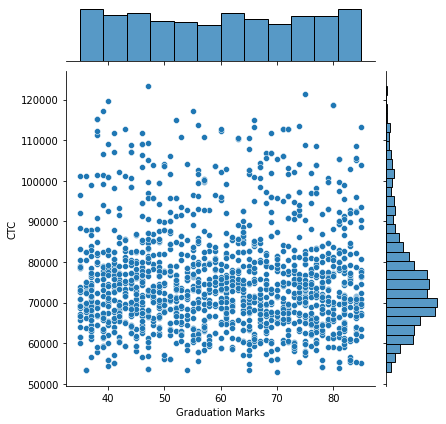

In [324]:
sns.jointplot(x = "Graduation Marks",y = "CTC",data = df)

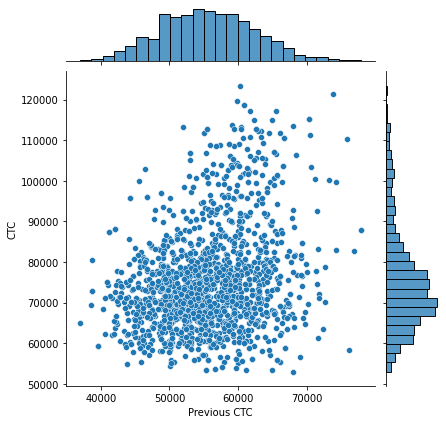

In [325]:
sns.jointplot(x = "Previous CTC",y = "CTC",data = df)

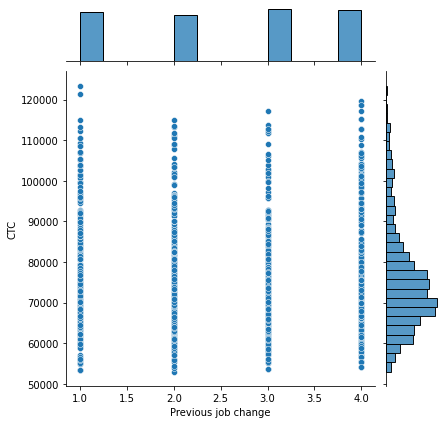

In [326]:
sns.jointplot(x = "Previous job change",y = "CTC",data = df)

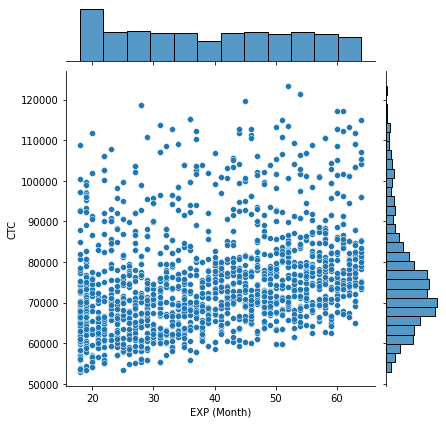

In [327]:
sns.jointplot(x = "EXP (Month)",y = "CTC",data = df)

## 2. Model Engineering
#### Model_1 : Multi Linear Regression
 * Using Statsmodels
 * Using Sklearn

In [328]:
df.corr()

College      City  Previous CTC  Previous job change  \
College              1.000000 -0.014946      0.041979            -0.055060   
City                -0.014946  1.000000      0.004644             0.051670   
Previous CTC         0.041979  0.004644      1.000000             0.005756   
Previous job change -0.055060  0.051670      0.005756             1.000000   
Graduation Marks     0.003539 -0.018616     -0.032976             0.019267   
EXP (Month)          0.011752 -0.023613      0.119163             0.023488   
CTC                 -0.029592 -0.020365      0.258000             0.011370   
Role_Executive       0.014749  0.048671     -0.012321             0.017150   
Role_Manager        -0.014749 -0.048671      0.012321            -0.017150   

                     Graduation Marks  EXP (Month)       CTC  Role_Executive  \
College                      0.003539     0.011752 -0.029592        0.014749   
City                        -0.018616    -0.023613 -0.020365        0.048671   
Previous CTC                -0.032976     0.119163  0.258000       -0.012321   
Previous job change          0.019267     0.023488  0.011370        0.017150   
Graduation Marks             1.000000    -0.057061 -0.005450       -0.017858   
EXP (Month)                 -0.057061     1.000000  0.301115        0.026751   
CTC                         -0.005450     0.301115  1.000000       -0.621311   
Role_Executive              -0.017858     0.026751 -0.621311        1.000000   
Role_Manager                 0.017858    -0.026751  0.621311       -1.000000   

                     Role_Manager  
College                 -0.014749  
City                    -0.048671  
Previous CTC             0.012321  
Previous job change     -0.017150  
Graduation Marks         0.017858  
EXP (Month)             -0.026751  
CTC                      0.621311  
Role_Executive          -1.000000  
Role_Manager             1.000000

In [329]:
X_multi = df.loc[:, df.columns !="CTC"]

In [330]:
X_multi.head()

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     0       55523.0                    3                66   
1        2     0       57081.0                    1                84   
2        3     0       60347.0                    2                52   
3        3     0       49010.0                    2                81   
4        1     0       57879.0                    4                74   

   EXP (Month)  Role_Executive  Role_Manager  
0           19               0             1  
1           18               1             0  
2           28               1             0  
3           33               1             0  
4           32               1             0

In [331]:
y_multi = df['CTC']

In [332]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [333]:
X_multi_cons = sn.add_constant(X_multi)

In [334]:
X_multi_cons.head()

const  College  City  Previous CTC  Previous job change  Graduation Marks  \
0    1.0        2     0       55523.0                    3                66   
1    1.0        2     0       57081.0                    1                84   
2    1.0        3     0       60347.0                    2                52   
3    1.0        3     0       49010.0                    2                81   
4    1.0        1     0       57879.0                    4                74   

   EXP (Month)  Role_Executive  Role_Manager  
0           19               0             1  
1           18               1             0  
2           28               1             0  
3           33               1             0  
4           32               1             0

In [335]:
m1_multi_stats = sn.OLS(y_multi, X_multi_cons).fit()

In [336]:
m1_multi_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          4.70e-257
Time:                        11:23:38   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.211e+04   1463.780     21.936      0.000    2.92e+04     3.5e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Executive       6311.2273    760.861      8.295      0.000    4818.825    7803.630
Role_Manager          2.58e+04    797.098     32.366      0.000    2.42e+04    2.74e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     2.30e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.36e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [337]:
m1_multi_lr = LinearRegression()

In [338]:
m1_multi_lr.fit(X_multi, y_multi)

LinearRegression()

In [339]:
print(m1_multi_lr.intercept_, m1_multi_lr.coef_)

48164.823735802085 [-4.81514705e+02  3.80830787e+02  4.10090279e-01  1.26565295e+02
  6.23621203e+00  2.61344394e+02 -9.74371393e+03  9.74371393e+03]


In [340]:
y_pred = m1_multi_lr.predict(X_multi)

In [341]:
mse = mean_squared_error(y_multi,y_pred)
r2 = r2_score(y_multi,y_pred)

In [342]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  73736458.29764368 
R2 Score - 0.5343159981702307


##### Note : Since Our Dependent variable is continuous such that Classification methods are not applicable.

#### Model_2 : Decision Tree Regressor

In [343]:
X = df.loc[:,df.columns!="CTC"]

In [344]:
y = df["CTC"]

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [346]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1271, 8) (318, 8) (1271,) (318,)


In [347]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [348]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [349]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [372]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

In [373]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  60424631.02613475 
R2 Score - 0.5927831611924911


In [374]:
dot_data = tree.export_graphviz(regtree, out_file=None,feature_names= X_train.columns, filled = True)

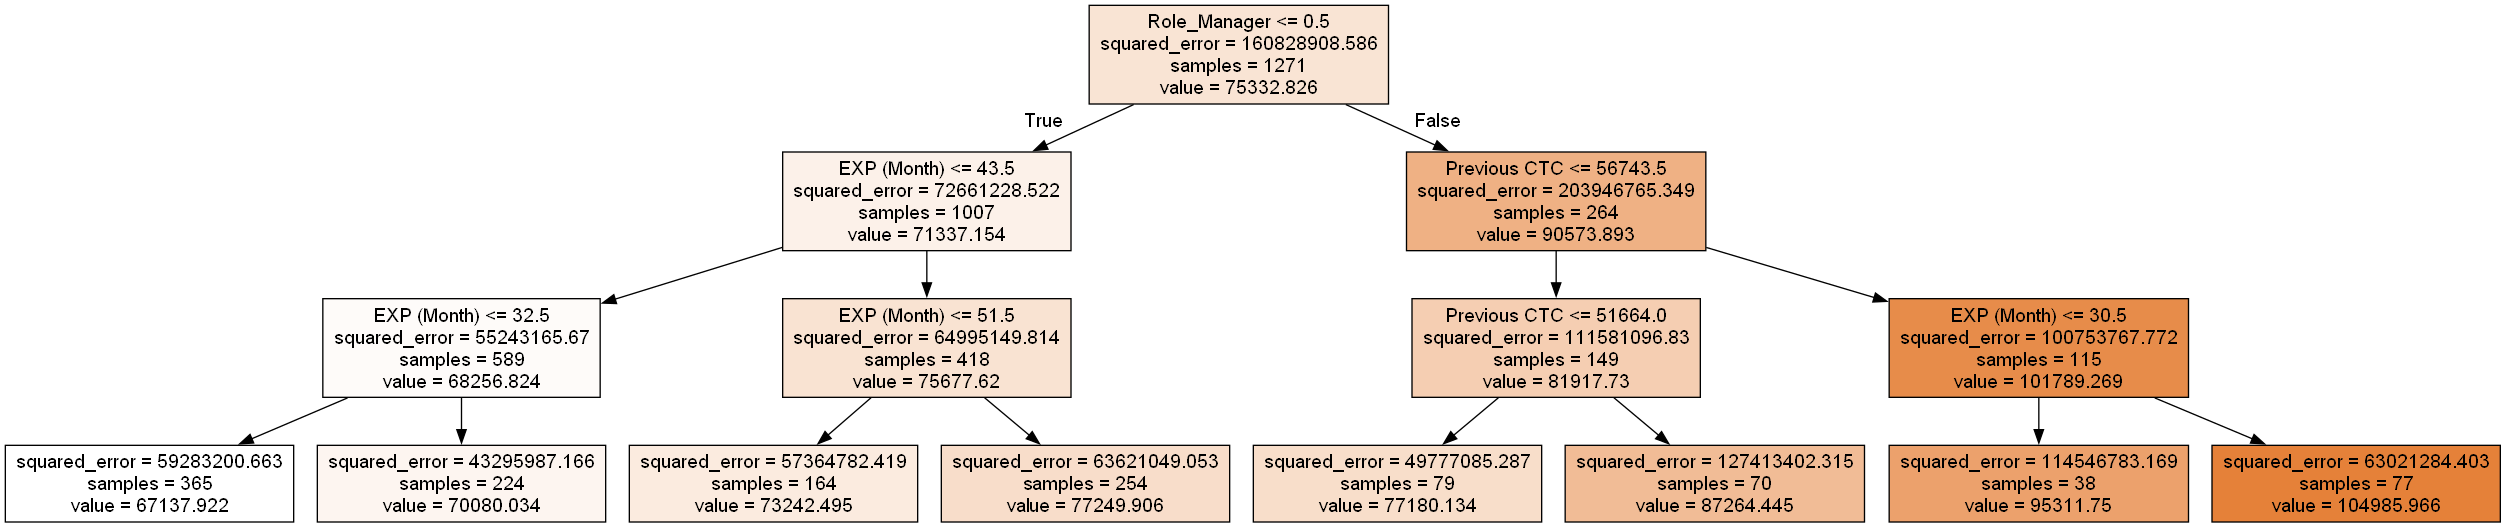

In [375]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### Model_3 : Random Forest Regressor

In [355]:
rf = RandomForestRegressor(n_estimators=250, random_state=42)  

In [356]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [357]:
predictions = rf.predict(X_test)

In [358]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [359]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  50230097.349703275 
R2 Score - 0.6614866965940986


#### Model_4 Gradient Boosting Machines Regressor

In [360]:
model = GradientBoostingRegressor(n_estimators = 250, learning_rate = 0.1, max_depth = 4, random_state = 42)

In [361]:
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=250, random_state=42)

In [362]:
pred = model.predict(X_test)

In [363]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test,pred)

In [364]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  54502725.99793167 
R2 Score - 0.6326923737826373


#### Model_5 XGBoost Regressor

In [438]:
m5 = XGBRegressor(n_estimators = 250, max_depth = 5, learning_rate = 0.1)

In [439]:
m5.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [440]:
pred = m5.predict(X_test)

In [368]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

In [377]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  60424631.02613475 
R2 Score - 0.5927831611924911


#### Model_6 - Ridge Regression

##### Standardizing

In [383]:
scaler = StandardScaler()

In [384]:
scaler.fit(X_train)

StandardScaler()

In [385]:
X_train_s = scaler.transform(X_train)

In [387]:
X_test_s = scaler.transform(X_test)

In [390]:
lm_r = Ridge(alpha = 0.5)

In [391]:
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [393]:
y_pred = lm_r.predict(X_test_s)

In [395]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [397]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  68910404.93750554 
R2 Score - 0.5355953891144283


#### Changing Hyper Parameters 

In [400]:
from sklearn.model_selection import validation_curve

In [401]:
param_range = np.logspace(-2,8,100)

In [411]:
train_scores, test_scores = validation_curve(
  Ridge(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [416]:
train_mean = np.mean(train_scores, axis = 1)

In [419]:
test_mean = np.mean(test_scores, axis = 1)

In [421]:
max(test_mean)

0.5258388482080626

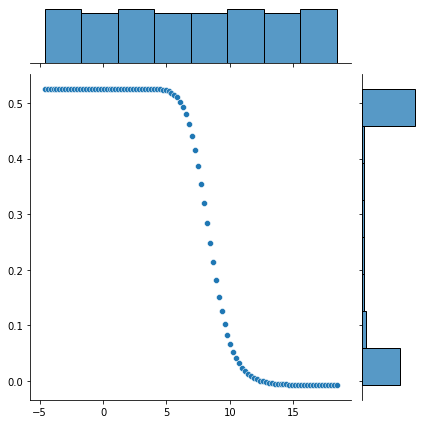

In [423]:
sns.jointplot(x=np.log(param_range),y = test_mean)

In [425]:
np.where(test_mean == max(test_mean))

(array([30], dtype=int64),)

In [427]:
param_range[30]

10.722672220103231

In [428]:
lm_r_best = Ridge(alpha = param_range[30])

In [430]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=10.722672220103231)

###### so the optimum value of alpha is 10.722672220103231

In [431]:
y_pred_best = lm_r.predict(X_test_s)

In [435]:
r2_score(y_test,y_pred_best)

0.5355953891144283

#### Model-7 Lasso Regression

In [443]:
lm_s = Lasso(alpha = 0.5)

In [445]:
lm_s.fit(X_train_s,y_train)

Lasso(alpha=0.5)

In [449]:
y_pred = lm_s.predict(X_test_s)

In [450]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [451]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  68908896.5345529 
R2 Score - 0.5356055546226256


#### Changing Hyper Parameters

In [452]:
from sklearn.model_selection import validation_curve

In [453]:
param_range = np.logspace(-2,8,100)

In [461]:
train_scores, test_scores = validation_curve(
  Lasso(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [462]:
train_mean = np.mean(train_scores, axis = 1)

In [463]:
test_mean = np.mean(test_scores, axis = 1)

In [464]:
max(test_mean)

0.525834018854759

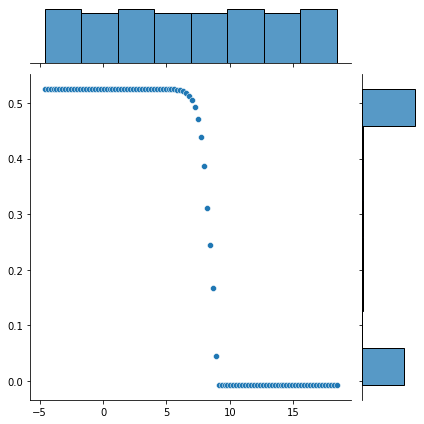

In [465]:
sns.jointplot(x=np.log(param_range),y = test_mean)

In [466]:
np.where(test_mean == max(test_mean))

(array([36], dtype=int64),)

In [467]:
param_range[36]

43.28761281083057

In [469]:
lm_s_best = Lasso(alpha = param_range[36])

In [471]:
lm_s_best.fit(X_train_s,y_train)

Lasso(alpha=43.28761281083057)

###### so the optimum value of alpha is 43.28761281083057

In [472]:
y_pred_best = lm_s.predict(X_test_s)

In [473]:
r2_score(y_test,y_pred_best)

0.5356055546226256

#### Q.1 Views About the problem statement?

##### Ans - The problem statement highlights the critical business challenges of determining the salaries for newly hired employees. 
##### TechWorks Consulting emphasis on considering various factors like :-
* College
* City
* Previous CTC
* Previous job change
* Graduation Marks
* EXP (Month)
* Role 
##### The incorporation of machine learning, specifically regression, suggests a forward-looking approach 
##### to automate and optimize salary prediction based on provided dataset.

#### Q.2 What will be your approach to solving this task?

##### Ans - My Approach
##### 1) Data Preprocessing:-
* Missing Values: By analyzing the provided data set the data does not contains any missing values
* Outliers : By analyzing the provided data set and then visualizing it in scatter_plot the data does not contain any Outliers
* Categorical Variables : By analyzing the data set, the data contains categorical columns name "College","City" and "Role" the college and city
                          data are provided in another dataset so i loaded the dataset using pandas and then categorized the data by converting the columns
                          of the dataset into lists and then categorzing it, categorized the Role column data by creating dummy variables.
#### 2) Modeling:-
* Model Selection : Evaluate various regression models like Linear Regression,Ridge Regression, Lasso Regression,Decision Tree Regression,
                    Random Forest Regression and XGBoost.
* Evaluation : The Evaluation is done by Split the data into training, validation, and test sets. Employee performance metrics like Mean Squared Error (MSE)
               R-Squared, Adjusted R-Squared to evaluate model performance on the validation set. 
* Tuning and Optimization: Fine-tuned parameters like learning rate, number of trees/estimators for optimal performance.
#### 3) Predictive Analysis:-
* Once the final model is optimized, it is then used to predict salaries for new employees based on their features. Analyzed the predictions and interpret the coefficients to understand which features have the most significant impact on salary.
* Monitored the model's performance over time through tracking metrics R-Squared.

#### Q.3 What were the available ML model options you had to perform this task?

##### Ans - Available ML Model Options:
* Linear Regression
* Decision tree Regressor
* Random Forest Regressor
* Gradient Boosting Machine Regressor
* XGBoost
* Ridge Regression
* Lasso Regression

#### Q.4 Which model’s performance is best and what could be the possible reason for that?

##### Ans - Random Forest Regressor is the best model for this dataset in order to predict the salaries for newly hired employees.
##### Reason - It is giving maximum accuracy or maximum r2 score as compared to other models that's why Random Forest Regressor is considered as the 
#####                best ml model for predicting the salaries for newly hired employees.
##### Accuracies or R2_scores of ML models:-
* Linear Regression                   -          0.5343159981702307
* Ridge Regression                    -          0.5355953891144283
* Lasso Regression                    -          0.5356055546226256
* Decision Tree Regression            -          0.5927831611924911
* Random Forest Regression            -          0.6614866965940986
* Gradient Boosting Machine Regressor -          0.6326923737826373
* XGBoost                             -          0.5927831611924911
##### As mentioned above Random Forest Regressor having the maximum R2_score of 0.6614866965940986, hence Random Forest Regressor is considered as the best ML model for the provided dataset.

#### Q.5 What steps can you take to improve this selected model’s performance even further?

##### Ans - Steps that can be taken in order to improve the model performance :-
* Gathering More Data: Acquiring more data, if feasible, will enhances the model's ability to generalize.
* Hyperparameter Tuning: Fine-tuning model hyperparameters ensures optimal performance.
* Ensemble Methods: Combining well-performing models through techniques like stacking or boosting may improve overall accuracy.
* Early stopping: Implement early stopping to prevent overfitting. Stop the training of the model when its performance on the validation set starts to decline.
* Feature importance analysis: Analyze the feature importance scores to understand which features have the most impact on salary predictions.